In [2]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 733.6 kB/s eta 0:00:15
   - -------------------------------------- 0.5/11.1 MB 733.6 kB/s eta 0:00:15
   - -------------------------------------- 0.5/11.1 MB 733.6 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/11.1 MB 570.5 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/11.1 MB 616.9 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/11.1 MB 687.1 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.1 MB 687.1 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.1 MB 687.1 kB/s eta 0:00:15
   ----- ---------------------------------- 1.6/11.1 MB 636.2 kB/s eta 0:00:15
   ------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Import Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# Load dataset
df = pd.read_csv("KaggleV2-May-2016.csv")  


Explore and Clean the Data

In [6]:
print(df.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [8]:
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [9]:
#Remove irrelevant columns and handle datatypes:
# Drop PatientId, AppointmentID as they don't add predictive value
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)



In [10]:
# Convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [11]:
# Convert No-show to binary (0: show, 1: no-show)
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

Create new features:

In [12]:
# Time gap between scheduling and appointment
df['DaysUntilAppt'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days



In [13]:
# Day of week
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [14]:
print(df.isnull().sum())


Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
DaysUntilAppt     0
DayOfWeek         0
dtype: int64


In [15]:
print(df.duplicated().sum())


635


In [16]:
df[df['Age'] < 0]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysUntilAppt,DayOfWeek
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0,-1,Monday


In [17]:
df = df[df['Age'] >= 0]


In [18]:
df = df[(df['Age'] >= 0) & (df['DaysUntilAppt'] >= 0)]


In [19]:
# SMS Reminder vs No-show
print(df.groupby('SMS_received')['No-show'].mean())


SMS_received
0    0.294377
1    0.275745
Name: No-show, dtype: float64


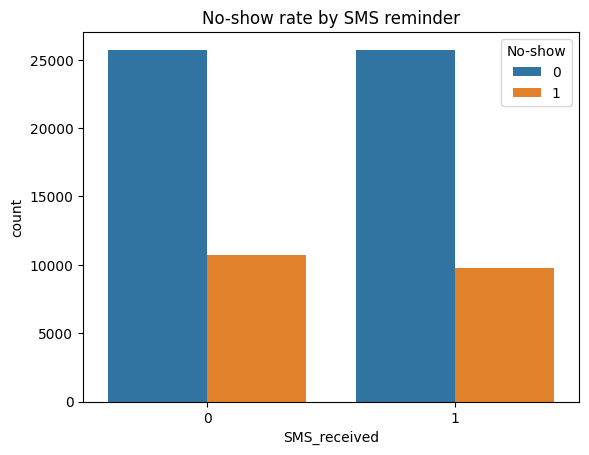

In [20]:
# Plotting
sns.countplot(data=df, x='SMS_received', hue='No-show')
plt.title("No-show rate by SMS reminder")
plt.show()


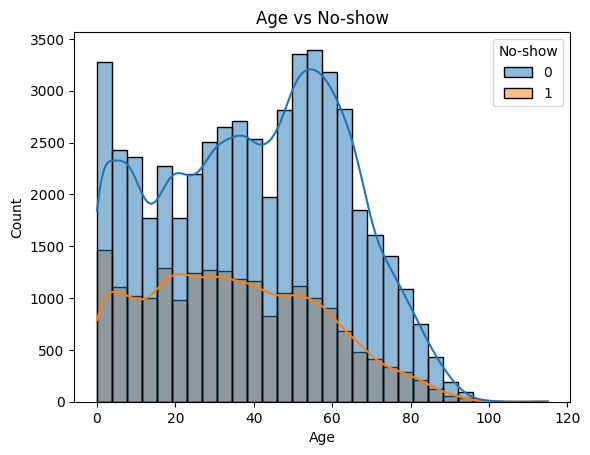

In [21]:
# Age distribution
sns.histplot(data=df, x='Age', hue='No-show', bins=30, kde=True)
plt.title("Age vs No-show")
plt.show()



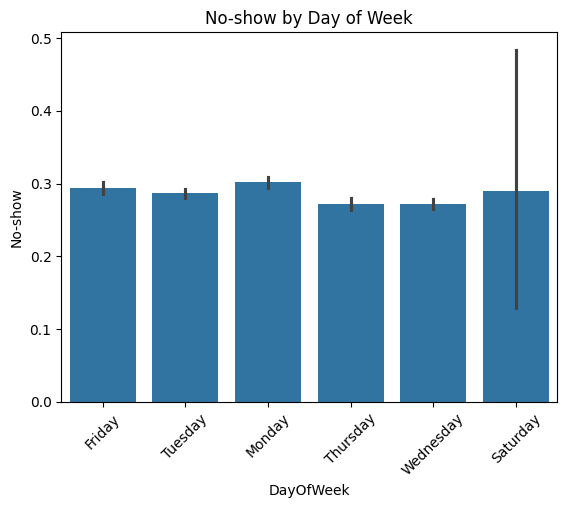

In [22]:
# Weekday trend
sns.barplot(data=df, x='DayOfWeek', y='No-show')
plt.title("No-show by Day of Week")
plt.xticks(rotation=45)
plt.show()

Prepare Data for Modeling

In [23]:
#Select features and split into train/test sets.
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Neighbourhood', 'DayOfWeek'], drop_first=True)


In [24]:
# Features and target
X = df.drop(columns=['ScheduledDay', 'AppointmentDay', 'No-show'])
y = df['No-show']



In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Decision Tree Model

In [26]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
# Predict and evaluate
y_pred = model.predict(X_test)


In [28]:
print(confusion_matrix(y_test, y_pred))


[[10264    37]
 [ 4054    37]]


In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.50      0.01      0.02      4091

    accuracy                           0.72     14392
   macro avg       0.61      0.50      0.43     14392
weighted avg       0.66      0.72      0.60     14392



In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7157448582545859


Feature importance

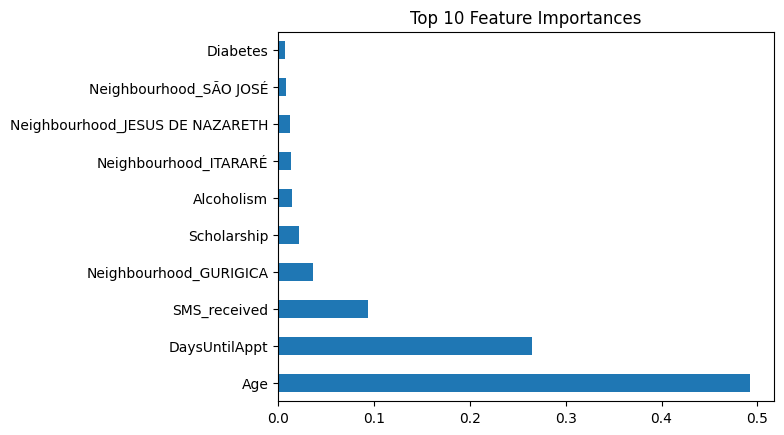

In [31]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [32]:
df["PredictedNoShow"] = model.predict(X)
df.to_csv("appointments_with_predictions.csv", index=False)

